In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import numpy as np
from scipy import stats
import pickle
import torch
import matplotlib
import matplotlib.pyplot as plt

/scratch/gpfs/wz1411/miniconda3/envs/vcmsa_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.size': 14
})

In [9]:
dataset = 'CBS'

result_folder_path = 'results_' + dataset
sp_path = result_folder_path + '/all_sp_results.txt'
tc_path = result_folder_path + '/all_tc_results.txt'

poolings = []
sp_results = []
tc_results = []

# Open the text file and process it
with open(sp_path, 'r') as f:
    for line in f:
        # Split each line into the layer name and its result
        pooling, result = line.strip().split(':')
        poolings.append(pooling)
        sp_results.append(float(result.strip()))

# Open the text file and process it
with open(tc_path, 'r') as f:
    for line in f:
        # Split each line into the layer name and its result
        _, result = line.strip().split(':')
        tc_results.append(float(result.strip()))

# Print to verify results
print("Layer Names:", poolings)
print("SP Results:", sp_results)
print("TC Results:", tc_results)

Layer Names: ['mean', 'min', 'max']
SP Results: [61.9, 61.9, 61.9]
TC Results: [33.3, 33.3, 33.3]


In [6]:
import glob
import os

input_directory = "../../data/Fasta/*.fasta"  #####################################################

dataset_list = []
for input_fasta in glob.glob(input_directory):
    dataset = os.path.splitext(os.path.basename(input_fasta))[0]
    dataset_list.append(dataset)

print(dataset_list)

['Ribosomal_L1', 'TyrKc', 'MCR_alpha', 'LIM', 'sh3', 'CUB', 'CH', 'transketolase_C', 'PGAM', 'biotin_lipoyl', 'ghf5', 'Phage_integrase', 'oat', 'serbact', 'cytc', 'Sulfotransfer', 'Peptidase_M24', 'icd', 'Cu_nir', 'dsrm', 'ung', 'DAHP_synth_1', 'GATase', 'cat', 'aldosered', 'COX3', 'ccH', 'FAD-oxidase_C', 'histone', 'AAA', 'Extradiol_dioxy', 'ghf1', 'UPF0076', 'HMA', 'Lum_binding', 'flav', 'tRNA-synt_1', 'gtp', 'RuBisCO_large', 'Asp_Glu_race_D', 'aldedh', 'csp', 'response_reg', 'tim', 'ghf18', 'citrate_synt', 'asp', 'ligase-CoA', 'HLH', 'aabp', 'MoCF_biosynth', 'CBS', 'zf-CCHH', 'subt', 'TIG', 'kunitz', 'Mur_ligase_C', 'phs', 'lacI', 'LMWPc', 'Toprim', 'ARM', 'NTP_transferase', 'sermam', 'Filamin', 'RuBisCO_large_N', 'Glyco_hydro_2', 'rnh', 'HGTP_anticodon', 'cys', 'bac_luciferase', 'ech', 'sh2', 'Nitroreductase', 'Orn_DAP_Arg_deC', 'Glyco_hydro_18_D2', 'uce', 'hla', 'DHOdehase', 'ghf34', 'PDZ', 'inositol_P', 'fer2', 'GAF', 'AhpC-TSA', 'ACPS', 'prt', 'PEP-utilizers', 'dCMP_cyt_deam', '

In [8]:
sp_results_for_mean = []
tc_results_for_mean = []

sp_results_for_max = []
tc_results_for_max = []

sp_results_for_min = []
tc_results_for_min = []

for dataset in dataset_list:

    result_folder_path = 'results_' + dataset
    sp_path = result_folder_path + '/all_sp_results.txt'
    tc_path = result_folder_path + '/all_tc_results.txt'

    sp_results = []
    tc_results = []

    # Open the text file and process it
    with open(sp_path, 'r') as f:
        for line in f:
            # Split each line into the layer name and its result
            pooling, result = line.strip().split(':')
            
            if pooling == 'mean':
                sp_results_for_mean.append(float(result.strip()))
            elif pooling == 'max':
                sp_results_for_max.append(float(result.strip()))
            elif pooling == 'min':
                sp_results_for_min.append(float(result.strip()))

    # Open the text file and process it
    with open(tc_path, 'r') as f:
        for line in f:
            # Split each line into the layer name and its result
            pooling, result = line.strip().split(':')

            if pooling == 'mean':
                tc_results_for_mean.append(float(result.strip()))
            elif pooling == 'max':
                tc_results_for_max.append(float(result.strip()))
            elif pooling == 'min':
                tc_results_for_min.append(float(result.strip()))

print("SP Results for Mean:", sp_results_for_mean)
print("TC Results for Mean:", tc_results_for_mean)

print("SP Results for Max:", sp_results_for_max)
print("TC Results for Max:", tc_results_for_max)

print("SP Results for Min:", sp_results_for_min)
print("TC Results for Min:", tc_results_for_min)

SP Results for Mean: [94.8, 94.8, 98.5, 96.2, 91.7, 96.0, 82.2, 70.2, 83.6, 90.5, 61.3, 70.5, 84.5, 93.9, 88.8, 66.7, 82.9, 93.2, 98.6, 93.0, 95.7, 57.4, 81.8, 91.2, 89.3, 71.8, 89.5, 26.5, 41.9, 45.4, 82.4, 89.0, 96.2, 98.1, 89.5, 86.4, 75.8, 69.2, 86.2, 75.2, 92.8, 99.0, 81.8, 97.4, 68.8, 87.9, 86.6, 74.0, 77.7, 93.9, 76.0, 61.9, 86.6, 70.5, 96.7, 84.7, 56.8, 93.3, 89.7, 99.6, 69.0, 70.1, 87.4, 93.4, 89.2, 68.9, 26.7, 87.9, 95.1, 85.1, 87.4, 93.2, 91.0, 86.3, 94.0, 30.9, 84.4, 100.0, 85.5, 41.8, 80.9, 70.4, 82.0, 81.6, 87.7, 67.8, 76.3, 79.6, 84.0, 92.0, 81.5, 82.7, 12.6, 74.4, 88.3, 81.5, 80.0, 82.3, 86.6, 86.1, 98.5, 71.1, 94.4, 70.3, 44.9, 88.8, 67.5, 87.5, 88.1, 90.9, 86.2, 71.2, 96.5, 94.3, 92.8, 97.1, 93.1, 70.1, 77.0, 74.2, 94.3, 82.1, 70.4, 94.3, 86.2, 100.0, 98.6, 74.4, 97.8, 78.9, 88.4, 89.2, 96.0, 95.1, 76.4, 53.0, 79.6, 91.0, 98.6, 67.3, 67.2, 45.2, 89.1, 70.9, 70.3, 95.2, 69.4, 96.8, 86.7, 89.3, 85.0]
TC Results for Mean: [91.1, 89.6, 97.8, 93.5, 83.1, 92.7, 72.7, 52.6, 

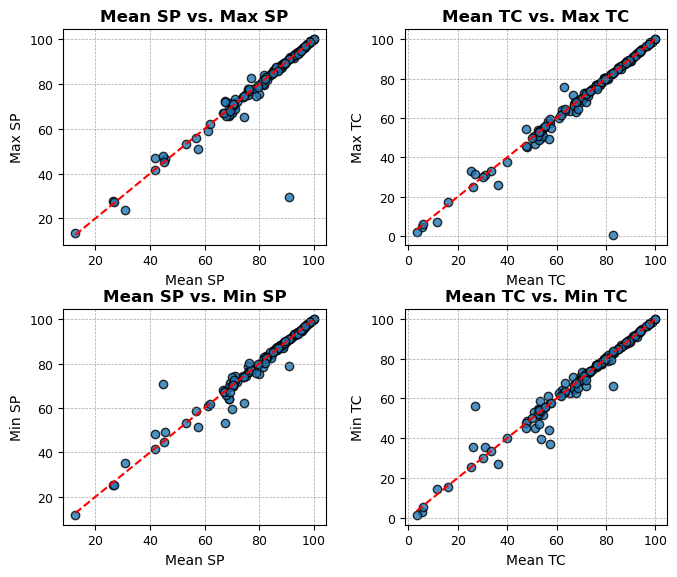

In [21]:
import matplotlib.pyplot as plt

# Plot mean SP VS. max SP, mean TC VS. max TC, mean SP VS. min SP, and mean TC VS. min TC
fig, ax = plt.subplots(2, 2, figsize=(7, 6))

# Shared plot settings
scatter_kwargs = {'alpha': 0.8, 'edgecolor': 'k'}  # Transparency and edge color
titles = [
    'Mean SP vs. Max SP',
    'Mean TC vs. Max TC',
    'Mean SP vs. Min SP',
    'Mean TC vs. Min TC'
]
x_labels = ['Mean SP', 'Mean TC', 'Mean SP', 'Mean TC']
y_labels = ['Max SP', 'Max TC', 'Min SP', 'Min TC']
data_pairs = [
    (sp_results_for_mean, sp_results_for_max),
    (tc_results_for_mean, tc_results_for_max),
    (sp_results_for_mean, sp_results_for_min),
    (tc_results_for_mean, tc_results_for_min)
]

for i, ax_i in enumerate(ax.flat):  # Iterate over axes
    x_data, y_data = data_pairs[i]
    ax_i.scatter(x_data, y_data, **scatter_kwargs)
    ax_i.plot([min(x_data), max(x_data)], [min(x_data), max(x_data)], 'r--')  # Diagonal line
    ax_i.set_title(titles[i], fontsize=12, fontweight='bold')
    ax_i.set_xlabel(x_labels[i], fontsize=10)
    ax_i.set_ylabel(y_labels[i], fontsize=10)
    ax_i.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    ax_i.tick_params(axis='both', which='major', labelsize=9)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Add spacing between subplots

plt.show()
    